The goal of this notebook is to use SHAP to assess feature importance in more complex models

In [1]:
import pickle
import shap
import pandas as pd
from predict_protein import download_cptac_original_order, select_features, train_model, utils
import matplotlib.pyplot as plt
import numpy as np

model_loc = '/Volumes/Ginkgo_Data/Data/2021-11_CPTACTrainedModels/out3'

In [2]:
cptac_list = download_cptac_original_order.download_cptac(n_tumors=8)
tumor_df = pd.concat(cptac_list)
tm = train_model.LearnCPTAC(tumor_df)


cptac warning: Your version of cptac (1.1.0) is out-of-date. Latest is 1.1.2. Please run 'pip install --upgrade cptac' to update it. (/usr/local/Cellar/python@3.9/3.9.7_1/Frameworks/Python.framework/Versions/3.9/lib/python3.9/threading.py, line 910)


cptac warning: transcriptomics data was not found for the following samples, so transcriptomics data columns were filled with NaN for these samples: C3L-00563.N, C3L-00605.N, C3L-00769.N, C3L-00770.N, C3L-00771.N, C3L-00930.N, C3L-00947.N, C3L-00963.N, C3L-01246.N, C3L-01249.N, C3L-01252.N, C3L-01256.N, C3L-01257.N, C3L-01744.N, C3N-00200.N, C3N-00729.N, C3N-01211.N, NX1.N, NX10.N, NX11.N, NX12.N, NX13.N, NX14.N, NX15.N, NX16.N, NX17.N, NX18.N, NX2.N, NX3.N, NX4.N, NX5.N, NX6.N, NX7.N, NX8.N, NX9.N (/Users/edwardlau/PythonProjects/CPTAC_Protein/predict_protein/download_cptac_original_order.py, line 38)
cptac warning: proteomics data was not found for the following samples, so proteomics data columns were filled with NaN for these samples: 01OV002, 01OV008, 01OV010, 01OV013, 01OV019, 01OV045, 01OV046, 01OV049, 02OV035, 02OV040, 02OV042, 02OV045, 04OV041, 11OV009, 13OV004, 17OV019, 17OV034, 22OV001, 26OV010 (/Users/edwardlau/PythonProjects/CPTAC_Protein/predict_protein/download_cptac_ori

In [3]:
def get_model(tm_obj, model_loc, model, protein_todo):

    with open(model_loc, 'rb') as f:
        model_results = pickle.load(f)

    protein_model  = [result['model'] for result in model_results if result['metrics'].index[0] == protein_todo][0]

    # Get features and then do train test split again
    tm_obj.included_features = model
    print(tm_obj.included_features)
    x_train, x_test, y_train, y_test = tm_obj.get_train_test(protein_to_do=protein_todo)

    # Output a pandas data frame with y (actual mass spec protein level) and y_hat (predicted from transcript(s))
    train_df = pd.DataFrame({'y': y_train, 'yhat': protein_model.predict(x_train[protein_model.feature_names_in_]), 'set': 'train'})
    test_df = pd.DataFrame({'y': y_test, 'yhat': protein_model.predict(x_test[protein_model.feature_names_in_]), 'set': 'test'})

    return protein_model, x_test # pd.concat([train_df, test_df])


corum


Permutation explainer: 259it [02:03,  1.94it/s]                         


corum


Permutation explainer: 259it [02:10,  1.83it/s]                         


corum


Permutation explainer: 259it [02:07,  1.87it/s]                         


corum


Permutation explainer: 255it [02:10,  1.79it/s]                         


corum


Permutation explainer: 255it [02:10,  1.81it/s]                         


corum


Permutation explainer: 259it [02:15,  1.75it/s]                         


corum


Permutation explainer: 259it [01:59,  1.98it/s]                         


corum


Permutation explainer: 259it [02:04,  1.90it/s]                         


corum


Permutation explainer: 257it [02:06,  1.87it/s]                         


corum


Permutation explainer: 256it [02:06,  1.85it/s]                         


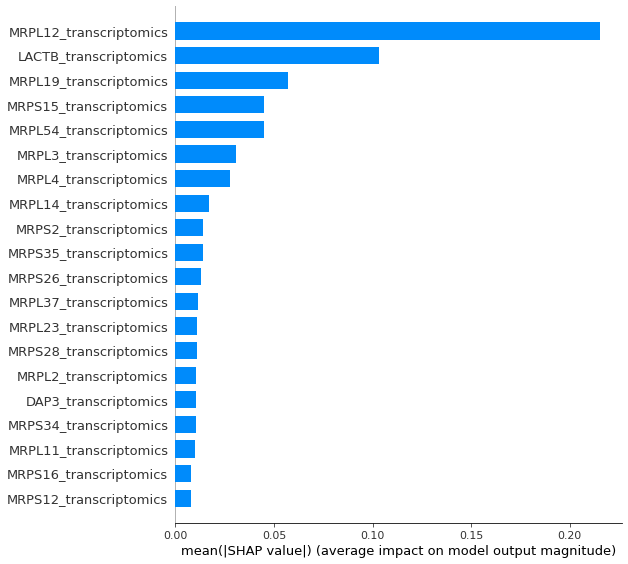

In [4]:
for model in ['corum', ]: # 'single', 'corum', 'stringhi', 'string'

    # LACTB
    for protein in ['MRPL20', 'MRPS34', 'MRPS27', 'MRPS21', 'MRPS17', 'MRPL1', 'DAP3', 'MRPL19', 'MRPL41', 'MRPS33']:
    # TOP 30
    # for protein in ['APOL1', 'BORCS8', 'CACNA1A','CAPZB', 'CMC1', 'COL18A1',
    #                 'CPLX3', 'DAG1', 'DLG4', 'EPN1', 'ESPL1', 'F7', 'GNB1',
    #                 'GP1BA', 'GTF2F1', 'HSPA1A', 'HUS1B', 'IDH3B', 'IRAK2',
    #                 'ITGA2B', 'KCNQ2', 'LAMA5', 'LRP5', 'MPP3', 'MRPL53',
    #                 'NDUFAF1', 'NEDD8', 'NGDN', 'NPHP4', 'PATJ', 'PCCB',
    #                 'PHF21B', 'PHKG1', 'PPP3R1', 'PSMB5', 'PSMB6', 'PSMC3IP',
    #                 'PSMG2', 'REV1', 'RPA3', 'RPGRIP1L', 'RPS29', 'SERPINA1',
    #                 'SERPIND1', 'SMCR8', 'TEN1', 'TNIP2', 'TTR', 'UBA52', 'YBX3',]:

    # ING2
        # ['SAP30', 'ARID4A', 'RBBP4', 'HDAC1', 'RBBP7', 'BRMS1L', 'HDAC2', 'SIN3A', 'SAP130', 'ING2', 'SUDS3', 'BRMS1']:
    # 6 highlighted proteins in the manuscript
    # ['CMC1', 'PCCB', 'PSMG2', 'SMCR8', 'MICU2', 'PPP3R1']:
        for method in ['forest']: #['elastic', 'forest', 'boosting']:
            m, X = get_model(tm_obj=tm,
                                 model_loc=f'{model_loc}/tumor8_{method}_{model}.p',
                                 model=model,
                                 protein_todo=protein,
                            )
            # Reorder the X data frame
            X = X[m.feature_names_in_]
            #%% SHAP
            X100 = shap.utils.sample(X, 100)
            explainer = shap.Explainer(m.predict, X100) #, max_evals=1000)
            shap_values = explainer(X)

            #%%# Plot SHAP
            shap.plots.beeswarm(shap_values, max_display=7, show=False)
            plt.tight_layout()
            plt.savefig(f'08_SHAPFeatureImportance_Output/{model}_{method}/00_LACTB_{protein}_R1.pdf')
            plt.close()
            shap.summary_plot(shap_values, X, plot_type="bar", show=False)


In [5]:
import unicodedata
import re

def slugify(value, allow_unicode=False):
    """
    Taken from https://github.com/django/django/blob/master/django/utils/text.py
    Convert to ASCII if 'allow_unicode' is False. Convert spaces or repeated
    dashes to single dashes. Remove characters that aren't alphanumerics,
    underscores, or hyphens. Convert to lowercase. Also strip leading and
    trailing whitespace, dashes, and underscores.
    """
    value = str(value)
    if allow_unicode:
        value = unicodedata.normalize('NFKC', value)
    else:
        value = unicodedata.normalize('NFKD', value).encode('ascii', 'ignore').decode('ascii')
    value = re.sub(r'[^\w\s-]', '', value.lower())
    return re.sub(r'[-\s]+', '-', value).strip('-_')

corum = pd.read_table('/Users/edwardlau/PythonProjects/CPTAC_Protein/data/corum/tidy_corum_homosapiens.txt')
# get all unique complexes
corum_complexes = corum['ComplexName'].unique()

for corcom in corum_complexes[:10]:
    print(corcom)
    print(slugify(corcom))

BCL6-HDAC4 complex
bcl6-hdac4-complex
BCL6-HDAC5 complex
bcl6-hdac5-complex
BCL6-HDAC7 complex
bcl6-hdac7-complex
Multisubunit ACTR coactivator complex
multisubunit-actr-coactivator-complex
Condensin I complex
condensin-i-complex
BLOC-3 (biogenesis of lysosome-related organelles complex 3)
bloc-3-biogenesis-of-lysosome-related-organelles-complex-3
BLOC-2 (biogenesis of lysosome-related organelles complex 2)
bloc-2-biogenesis-of-lysosome-related-organelles-complex-2
MUS81-CDS1 complex
mus81-cds1-complex
NCOR complex
ncor-complex
BLOC-1 (biogenesis of lysosome-related organelles complex 1)
bloc-1-biogenesis-of-lysosome-related-organelles-complex-1


In [6]:


for model in ['corum', ]: # 'single', 'corum', 'stringhi', 'string'
    for corcom in corum_complexes:
        protein_list = corum[corum['ComplexName'] == corcom]['SubunitGN'].unique()
        for protein in protein_list:
            for method in ['boosting']: #['elastic', 'forest', 'boosting']:
                m, X = get_model(tm_obj=tm,
                                     model_loc=f'{model_loc}/tumor8_{method}_{model}.p',
                                     model=model,
                                     protein_todo=protein,
                                )
                # Reorder the X data frame
                X = X[m.feature_names_in_]
                #%% SHAP
                X100 = shap.utils.sample(X, 100)
                explainer = shap.Explainer(m.predict, X100) #, max_evals=1000)
                shap_values = explainer(X)

                #%%# Plot SHAP
                shap.plots.beeswarm(shap_values, max_display=11, show=False)
                plt.tight_layout()
                plt.savefig(f'08_SHAPFeatureImportance_Output/{model}_{method}/all_complexes/{slugify(corcom)}_{protein}_R1.pdf')
                plt.close()


corum


Exact explainer: 156it [01:25,  1.62it/s]                         


corum


Exact explainer: 252it [00:11,  2.87it/s]                         


corum


Exact explainer: 156it [01:24,  1.62it/s]                         


corum
corum


Exact explainer: 156it [01:25,  1.60it/s]                         


corum
corum


Permutation explainer: 250it [02:00,  1.91it/s]                         


corum


Permutation explainer: 243it [01:22,  2.59it/s]                         


corum


Permutation explainer: 142it [00:51,  2.20it/s]                         


corum


Permutation explainer: 213it [01:13,  2.51it/s]                         


corum


Permutation explainer: 259it [01:36,  2.41it/s]                         


corum


Exact explainer: 225it [00:18,  5.56it/s]                         


corum


Exact explainer: 240it [00:19,  6.04it/s]                         


corum


Exact explainer: 225it [00:18,  5.57it/s]                         


corum


Permutation explainer: 259it [01:38,  2.36it/s]                         


corum
corum
corum


Permutation explainer: 252it [01:31,  2.45it/s]                         


corum


Permutation explainer: 177it [01:00,  2.42it/s]                         


corum


Permutation explainer: 219it [01:20,  2.36it/s]                         


corum


IndexError: list index out of range